In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW3_Gradescope.ipynb")

# Homework 3

## Instructions

1. Do not move or rename the included files. If you move or rename files or folders, the local and Gradescope autograders will not work.
1. Refer to files and variables exactly as they appear. Python is case-sensitive, so `df` and `DF` are different variables.
1. After you answer a question, you may run its public tests.
1. After you answer every question:
    1. Restart your kernel
    1. Run up to the last cell
    1. Save your notebook
    1. Run the last cell, which creates the .zip file for Gradescope in the same folder as this notebook
    1. Upload the .zip file to Gradescope
    1. Make sure your local autograder results match your Gradescope autograder results
1. ***The public tests ensure your answers are formatted correctly but do not ensure your answers are correct.***
1. Gradescope runs hidden tests in addition to the public tests but does not reveal public test results until after the due date. Your grade will be "~/100" until after the due date.

## Packages

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
asgnd_seed = 12000

In [4]:
np.random.seed(asgnd_seed)
all_tickers = ['AAPL', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'T', 'UNH', 'V', 'VZ', 'WMT', 'XOM']

stock_list = sorted(np.random.choice(all_tickers,7,replace=False))

print(f'These are the tickers of the five stocks assigned to you: {" ".join(stock_list)}. They are stored in a \
variable called stock_list.')

These are the tickers of the five stocks assigned to you: BA BAC GS JNJ MCD MRK V. They are stored in a variable called stock_list.


## Questions

---

#### 1. Create a DataFrame called **prices** to store the Adjusted Closing Price from Yahoo!Finance for the seven companies you were assigned above. Their tickers are included in a variable called **stock_list**. The sample period is January 1st, 2010 to March 31st, 2023. Each stock's price should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 10

In [5]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2023,3,31)
prices=yf.download(list(stock_list),start-pd.offsets.BDay(1),end+pd.offsets.BDay(1))['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [6]:
grader.check("q01")

q01 results: All test cases passed!

---

#### 2. Create a DataFrame named **investments** to store the daily value of a $1 investment made on the last trading day in December 2009 in each of the seven stocks. The investment in each stock should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 10

In [7]:
investments = pd.DataFrame()
for tic in prices:
    investments[tic] = prices[tic]/prices[tic].iloc[0]
investments.head()

,BA,BAC,GS,JNJ,MCD,MRK,V
Date,,,,,,,
2009-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-04,1.037872,1.041832,1.025112,1.004192,1.005445,1.012862,1.007775
2010-01-05,1.071864,1.075697,1.043235,0.992548,0.997758,1.016968,0.996227
2010-01-06,1.104378,1.088313,1.032101,1.000621,0.984145,1.030652,0.982849
2010-01-07,1.149086,1.124170,1.052298,0.993480,0.991352,1.032293,0.991996


In [8]:
grader.check("q02")

q02 results:
    q02 - 1 result:
        ✅ Test case passed

    q02 - 2 result:
        ❌ Test case failed
        Trying:
            investments.sum().values
        Expecting:
            array([12824.91413411,  5300.24469   ,  4582.25613663,  7550.31941271,
                    9974.98807714,  7516.36093401, 17180.52960308])
        **********************************************************************
        Line 1, in q02 1
        Failed example:
            investments.sum().values
        Expected:
            array([12824.91413411,  5300.24469   ,  4582.25613663,  7550.31941271,
                    9974.98807714,  7516.36093401, 17180.52960308])
        Got:
            array([12824.91528809,  5300.2442579 ,  4582.2561359 ,  7550.32005928,
                    9974.98803765,  7516.3609278 , 17180.52465095])

    q02 - 3 result:
        ✅ Test case passed

---

#### 3. Create a new pandas DataFrame named **ans3** to store the two best stock investments over the entire sample period and their total returns. The shape of the DataFrame should be either (2,1) or (1,2).

_Points:_ 5

In [9]:
best_tickers = investments.mean(axis=0).nlargest(2).index.tolist()

ans3 = pd.DataFrame(best_tickers)
ans3 = ans3.T
ans3.columns = ['Ticker1', 'Ticker2']
ans3

,Ticker1,Ticker2
0,V,BA


In [10]:
grader.check("q03")

q03 results: All test cases passed!

---

#### 4. Create a new pandas DataFrame named **ans4** to store the two worst stock investments over the entire sample period and their total returns. The shape of the DataFrame should be either (2,1) or (1,2).

_Points:_ 5

In [11]:
best_tickers = investments.mean(axis=0).nsmallest(2).index.tolist()

ans4 = pd.DataFrame(best_tickers)
ans4 = ans4.T
ans4.columns = ['Ticker1', 'Ticker2']
ans4

,Ticker1,Ticker2
0,GS,BAC


In [12]:
grader.check("q04")

q04 results: All test cases passed!

---

#### 5. Create a new DataFrame named **investments_mon** to store the end of the month values for each of the seven investment series created in question 2. Again, each column should be labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 10

In [13]:
prices_monthly = investments.resample('M').last()

# creating new df
investments_mon = pd.DataFrame(columns=prices.columns)

# get last val in month
for col in prices_monthly.columns:
    investments_mon[col] = prices_monthly[col].dropna()
    
investments_mon

,BA,BAC,GS,JNJ,MCD,MRK,V
Date,,,,,,,
2009-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-31,1.119527,1.007968,0.880834,0.975935,0.999840,1.044882,0.937915
2010-02-28,1.174786,1.106242,0.928101,0.985593,1.031273,1.009305,0.976540
2010-03-31,1.350558,1.185980,1.012867,1.020010,1.077628,1.032871,1.042383
2010-04-30,1.347210,1.184650,0.861914,1.005931,1.140134,0.968991,1.033223
...,...,...,...,...,...,...,...
2022-11-30,4.240861,2.977811,2.810130,4.036859,6.309261,4.905854,10.882805
2022-12-31,4.516109,2.620917,2.498880,4.006242,6.095089,4.975579,10.419408
2023-01-31,5.049772,2.807673,2.662110,3.706200,6.184597,4.816827,11.545303


In [14]:
grader.check("q05")

q05 results: All test cases passed!

---

#### 6. Create a new DataFrame named **returns_mon** to store the monthly simple returns for each of the seven stocks. Each column should be labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 10

In [15]:
# dropping na fails the autograder due to a shape error, so I am keeping the na vals
returns_mon = prices_monthly.pct_change()
returns_mon

,BA,BAC,GS,JNJ,MCD,MRK,V
Date,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-31,0.119527,0.007968,-0.119166,-0.024065,-0.000160,0.044882,-0.062085
2010-02-28,0.049360,0.097497,0.053662,0.009896,0.031438,-0.034049,0.041182
2010-03-31,0.149620,0.072080,0.091333,0.034920,0.044949,0.023348,0.067425
2010-04-30,-0.002479,-0.001121,-0.149036,-0.013803,0.058004,-0.061847,-0.008788
...,...,...,...,...,...,...,...
2022-11-30,0.255210,0.050222,0.128218,0.029769,0.006112,0.088142,0.049841
2022-12-31,0.064904,-0.119851,-0.110760,-0.007584,-0.033946,0.014213,-0.042581
2023-01-31,0.118169,0.071256,0.065321,-0.074894,0.014685,-0.031906,0.108057


In [16]:
grader.check("q06")

q06 results: All test cases passed!

---

#### 7. Create a DataFrame named **weights** with three columns: 1) TICKER (set as the index); 2) Random_Weights and 3) Equal_Weights. Use the assigned seed as the random seed when generating the random weights.

_Points:_ 10

In [17]:
np.random.seed(asgnd_seed)

random_weights = np.random.uniform(size=len(stock_list))
random_weights = random_weights / np.sum(random_weights)

equal_weights = [1/len(stock_list)] * len(stock_list)

weights = pd.DataFrame({'Random_Weights': random_weights, 'Equal_Weights': equal_weights}, index=stock_list)
weights.index.name = 'TICKER'
weights

,Random_Weights,Equal_Weights
TICKER,,
BA,0.144315,0.142857
BAC,0.145007,0.142857
GS,0.161602,0.142857
JNJ,0.142517,0.142857
MCD,0.272467,0.142857
MRK,0.029785,0.142857
V,0.104307,0.142857


In [18]:
grader.check("q07")

q07 results: All test cases passed!

---

#### 8. Create a new DataFrame labeled **portfolios** to compute and store the returns of four portfolios: a) two monthly-rebalanced portfolios allocated to the seven stocks according to the random weights, as well as the equal weights (Label the columns 'RW_MR_Ret' and 'EW_MR_Ret', respectively) and b) two buy-and-hold portfolios allocated to the seven stocks according to the random weights, as well as the equal weights (Label the columns 'RW_BH_Ret' and 'EW_BH_Ret', respectively). Drop any observations with missing values.

_Points:_ 10

In [19]:
# random weights, rebalanced
rw_mr = pd.DataFrame({'RW_MR_Ret':np.dot(returns_mon,list(weights.Random_Weights))},index = returns_mon.index)

# equal weights, rebalanced
ew_mr = pd.DataFrame({'EW_MR_Ret':np.dot(returns_mon,list(weights.Equal_Weights))},index = returns_mon.index)

# random weights, bh
rw_bh = pd.DataFrame({'RW_BH': np.dot(investments_mon, list(weights.Random_Weights))},index = investments_mon.index)
rw_bh['RW_BH_Ret'] = rw_bh['RW_BH'].pct_change()
rw_bh.drop(columns=['RW_BH'], inplace=True)

# equal weights, bh
ew_bh = pd.DataFrame({'EW_BH': np.dot(investments_mon, list(weights.Equal_Weights))},index = investments_mon.index)
ew_bh['EW_BH_Ret'] = ew_bh['EW_BH'].pct_change()
ew_bh.drop(columns=['EW_BH'], inplace=True)

In [20]:
# merging and dropping missing vals
portfolios = pd.concat([rw_mr, ew_mr, rw_bh, ew_bh], axis=1, join='inner').dropna()

In [21]:
portfolios

,RW_MR_Ret,EW_MR_Ret,RW_BH_Ret,EW_BH_Ret
Date,,,,
2010-01-31,-0.009465,-0.004728,-0.009465,-0.004728
2010-02-28,0.043190,0.035569,0.043182,0.035158
2010-03-31,0.071756,0.069097,0.073291,0.070780
2010-04-30,-0.013527,-0.025582,-0.011636,-0.023341
2010-05-31,-0.079211,-0.084859,-0.082228,-0.088166
...,...,...,...,...
2022-11-30,0.078565,0.086788,0.060512,0.070863
2022-12-31,-0.040260,-0.033658,-0.033764,-0.028519
2023-01-31,0.041591,0.038670,0.045858,0.046688


In [22]:
grader.check("q08")

q08 results: All test cases passed!

---

#### 9. Which of the four portfolios was the best performer over the entire sample period? What was its' cumulative (total) return over the entire sample period? Store the two values in two variables called **port9** and **ret9**, respectively.

_Points:_ 5

In [23]:
cumulative_returns = portfolios.add(1).cumprod().iloc[-1] - 1

# finding the best performer
port9 = cumulative_returns.idxmax()
ret9 = cumulative_returns[port9]

In [24]:
grader.check("q09")

q09 results: All test cases passed!

---

#### 10. Which of the four portfolios was the worst performer over the sample period January 2022 - March 2023? What was its' cumulative (total) return? Store the two values in two variables called **port10** and **ret10**, respectively.

_Points:_ 5

In [25]:
sample_portfolios = portfolios.loc['2022-01':'2023-03']
sample_cumulative_returns = sample_portfolios.add(1).cumprod().iloc[-1] - 1

# finding the worst performer
port10 = sample_cumulative_returns.idxmin()
ret10 = sample_cumulative_returns[port10]

In [26]:
grader.check("q10")

q10 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 11. Create a line plot of the four portfolio cumulative return series. Use "figsize", "grid" and "title" arguments in your plot.

_Points:_ 10

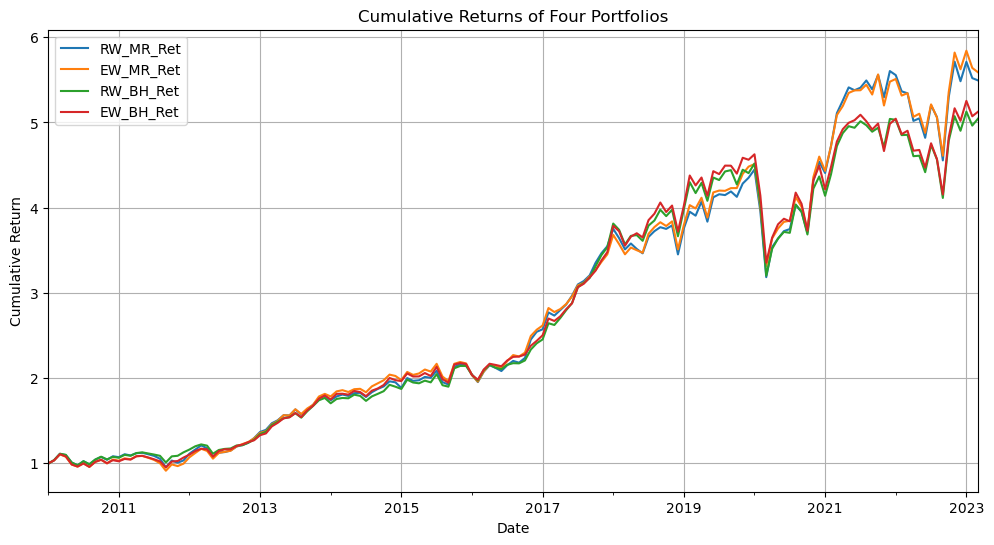

In [27]:
# plotting
portfolios.add(1).cumprod().plot(figsize=(12, 6), grid=True,title='Cumulative Returns of Four Portfolios')
plt.ylabel('Cumulative Return')
plt.show()

<!-- END QUESTION -->

---

<!-- BEGIN QUESTION -->

#### 12. Create a bar plot of the four portfolios' annualized monthly standard deviations. Use "figsize", "grid" and "title" arguments in your plot.

_Points:_ 10

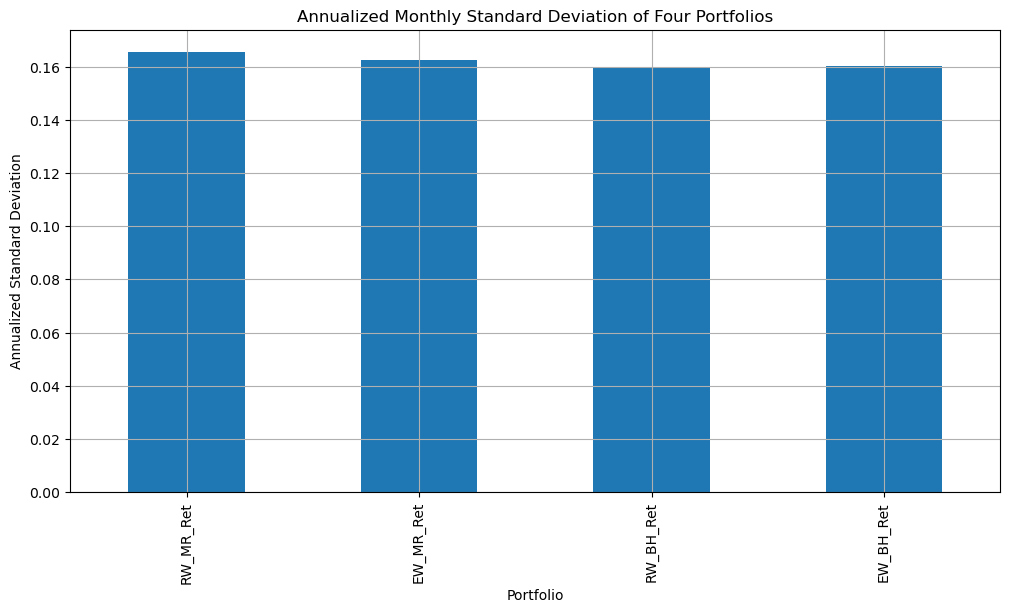

In [28]:
std_annualized = portfolios.std() * np.sqrt(12)

# plotting stds
std_annualized.plot(kind='bar', figsize=(12, 6), grid=True, title='Annualized Monthly Standard Deviation of Four Portfolios')

plt.ylabel('Annualized Standard Deviation')
plt.xlabel('Portfolio')
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [29]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q01 results: All test cases passed!

    q02 results:
        q02 - 1 result:
            ✅ Test case passed

        q02 - 2 result:
            ❌ Test case failed
            Trying:
                investments.sum().values
            Expecting:
                array([12824.91413411,  5300.24469   ,  4582.25613663,  7550.31941271,
                        9974.98807714,  7516.36093401, 17180.52960308])
            **********************************************************************
            Line 1, in q02 1
            Failed example:
                investments.sum().values
            Expected:
                array([12824.91413411,  5300.24469   ,  4582.25613663,  7550.31941271,
                        9974.98807714,  7516.36093401, 17180.52960308])
            Got:
                array([12824.91643023,  5300.24509856,  4582.257147